In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

# Uppgift 2

b) Anpassa modell till temperaturdata. Plotta data + anpassad modell i samma plott. Programmet ska även skriva ut värdet på amplituden, c3, och fasförskjutningen, ts, som förekommer i modellen (3).

In [2]:
def func(c, t): #För funktion (4)
    T = c[0] + c[1]*t + c[2]*np.sin((2*np.pi*t)/(365*24)) + c[3]*np.cos((2*np.pi*t)/(365*24))
    return T

def func3(c, t): #för funtion (3)
    F = c[0] + c[1] + c3*np.sin(omega*(t-ts))
    return F

Td = np.loadtxt('STOCKHOLMARLANDA.dat') #Tar in all data plus skapar en vektor för det. 
t = np.arange(0,len(Td),1) #Tar antal mätdata och skapar en vektor för dessa.
y = Td

M = np.array([np.ones(np.shape(Td)), t, np.sin((2*np.pi*t)/(365*24)), np.cos((2*np.pi*t)/(365*24)) ]).T

c = np.linalg.solve(M.T @ M,M.T @ y) #Löser för konstanterna c1, c2, a0 och a1 från funktion 4.

A0 = c[2] #De värdena vi bytte ut för att förenkla ekvationen

A1 = c[3] #samma som A0

omega = (2*np.pi)/(365*24) #För att förenkla vid beräkningar

c3 = np.sqrt(c[2]**2+c[3]**2)
ts = (np.arccos(c[2]/c3))/omega #fasförskjutningen 
#c3 = A0/(np.cos(omega*ts)) #amplituden

<IPython.core.display.Javascript object>


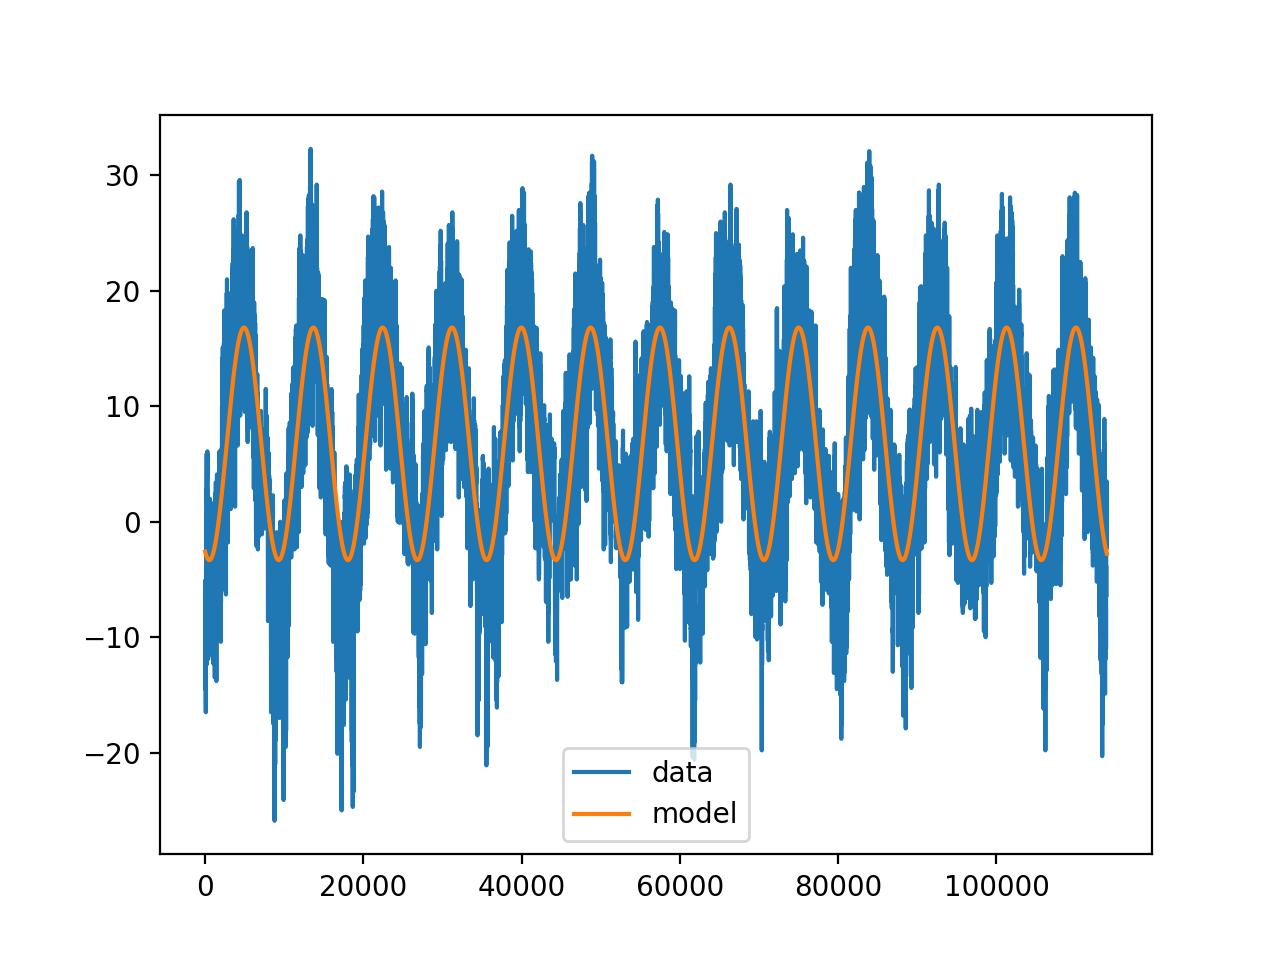

Amplituden (c3): 10.073977337735121 
Fasförskjutningen (ts): 2728.188067697157


In [3]:
plt.figure()
plt.plot(Td,label='data')
plt.plot(func3(c,t),label='model') #Använder funktion 3 när vi plottar
plt.legend()
print("Amplituden (c3):", c3, "\n" "Fasförskjutningen (ts):", ts) 

c) Beräkna normen av residualen, ‖Td −Tmod‖2 och skriv ut värdet. Td är givna tempera-
turdata som finns i filen och Tmod är motsvarande temperatur-
värden beräknat med modellen (4) (eller modellen (3)).

In [4]:
Td = np.loadtxt('STOCKHOLMARLANDA.dat') #tar in data på nytt
t = np.arange(0,len(Td),1)

T_mod = func(c,t) #skapar en ny vektor där all data samt konstanter är insatta
r2 = np.linalg.norm(Td - T_mod) #Beräknar normen av residualen
print("Normen av residualen är:", r2) #r2 är normen av residualen 

Normen av residualen är: 1582.7128803153994


e) Anpassa även modellen (4) till dygnsmedeltemperaturen. Använd nu ω = 2π/365.
Plotta data (dygnsmedeltemperaturerna) och den anpassade modellen i samma plott.
Beräkna och skriv ut normen av residualen, ‖Td −Tmod‖2.

In [5]:
#Beräkna medeldygnstemperaturen
Tm = []
Td = np.loadtxt('STOCKHOLMARLANDA.dat')

p = np.array_split(Td, 4748) #4748 eftersom detta är längden av Td/24
for i in p:
    medel = np.sum(list(i))/24
    Tm.append(medel)

In [6]:
def func(c, t): #För funktion (4)
    T = c[0] + c[1]*t + c[2]*np.sin((2*np.pi*t)/(365)) + c[3]*np.cos((2*np.pi*t)/(365))
    return T

def func3(c, t): #för funtion (3)
    F = c[0] + c[1] + c3*np.sin(omega*(t-ts))
    return F

#Td = np.loadtxt('STOCKHOLMARLANDA.dat') #Tar in all data plus skapar en vektor för det. 
t = np.linspace(0, 4748 , 4748) #Tar antal mätdata och skapar en vektor för dessa.
y = Tm

M = np.array([np.ones(np.shape(Tm)), t, np.sin((2*np.pi*t)/(365)), np.cos((2*np.pi*t)/(365)) ]).T

c = np.linalg.solve(M.T @ M,M.T @ y) #Löser för konstanterna c1, c2, a0 och a1 från funktion 4.

A0 = c[2] #De värdena vi bytte ut för att förenkla ekvationen

A1 = c[3] #samma som A0

omega = (2*np.pi)/(365) #För att förenkla vid beräkningar

c3 = np.sqrt(c[2]**2+c[3]**2) #Tips från er
ts = (np.arccos(c[2]/c3))/omega #amplituden

<IPython.core.display.Javascript object>


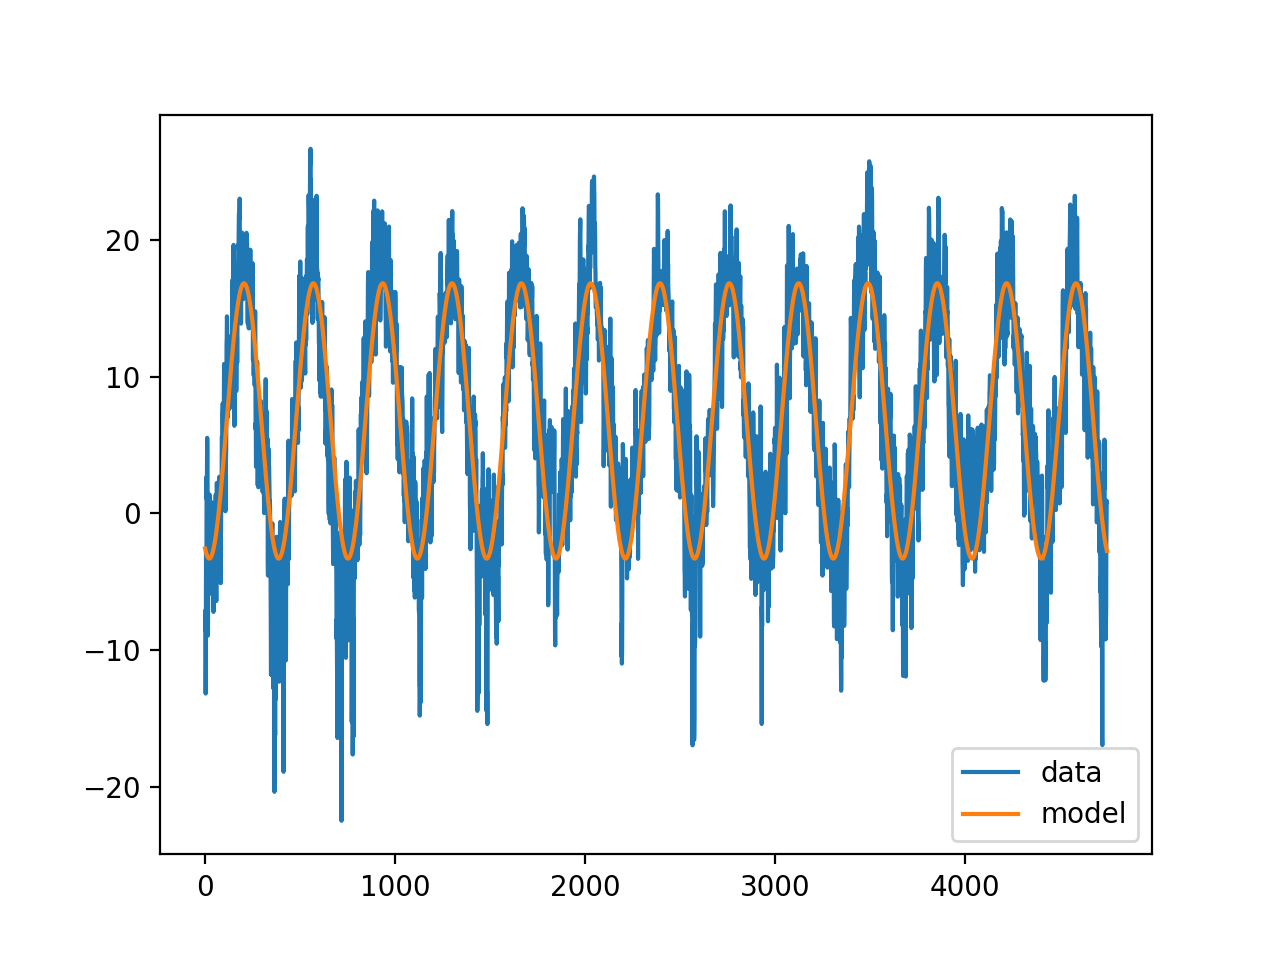

Amplituden (c3): 10.071151760207073 
Fasförskjutningen (ts): 113.68653268180736


In [7]:
plt.figure()
plt.plot(Tm,label='data') #våra datavärden medeldygnstemperaturen 
plt.plot(func3(c,t),label='model') #Använder funktion 3 när vi plottar
plt.legend()
print("Amplituden (c3):", c3, "\n" "Fasförskjutningen (ts):", ts)

In [8]:
T_mod = func(c,t) #skapar en ny vektor där all data samt konstanter är insatta
r2 = np.linalg.norm(Tm - T_mod) #Beräknar normen av residualen
print("Normen av residualen är:", r2) #r2 är normen av residualen 

Normen av residualen är: 262.0586880670193
